<a href="https://colab.research.google.com/github/error030/tranaformer/blob/main/whole%20process%20of%20a%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

下面展示数据下载以及数据的可视化

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
#转化为pathlib类的变量
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 4s 0us/step


In [8]:
print(type(dataset_url))
print(type(data_dir))
print(data_dir)
print(data_dir.resolve())

<class 'str'>
<class 'pathlib.PosixPath'>
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos


In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


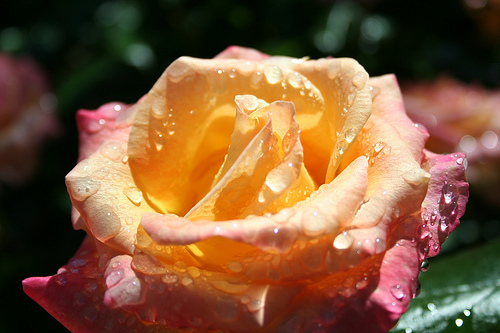

In [12]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [11]:
len(roses)

641

下面展示数据如何从文件形式导入为py中的格式

In [13]:
batch_size = 32
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [15]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


导入数据之后，展示数据的内容（下面是图片的范例）

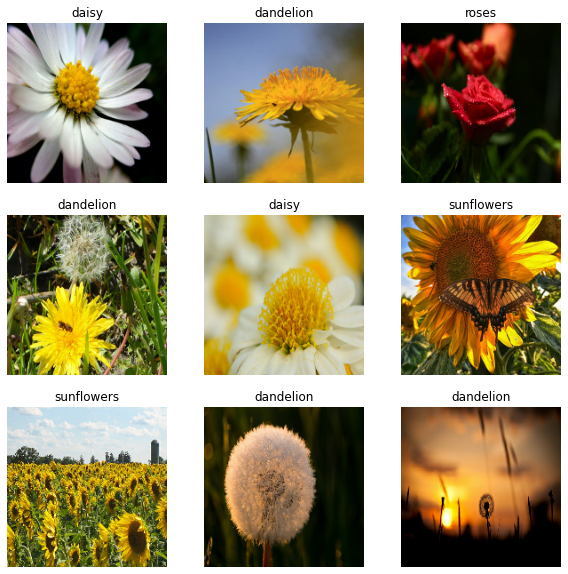

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,label in train_ds.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")
plt.show()

In [25]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)
